In [1]:
from nilearn.image import threshold_img, load_img, math_img, resample_to_img, new_img_like
from nilearn.plotting import plot_stat_map, plot_roi

import os
import numpy as np

In [2]:
ref_img = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/bids_dataset/derivatives/fmriprep-24.0.1/sub-01/ses-1/func/sub-01_ses-1_task-learning_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
ref_img = load_img(ref_img)

In [3]:
outpath = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/MNI152NLin2009cAsym'

# Bartra et al
### vmpfc and ventral striatum

In [4]:
bartra_path = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/bartra2013'

In [5]:
vmpfc_bartra = os.path.join(bartra_path, 'binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii')
vmpfc_bartra = load_img(vmpfc_bartra)
striatum_bartra = os.path.join(bartra_path, 'binConjunc_PvNxDECxRECxMONxPRI_striatum.nii')
striatum_bartra = load_img(striatum_bartra)

In [6]:
vmpfc_bartra_outspace = resample_to_img(vmpfc_bartra, ref_img, interpolation='nearest',   force_resample=True, copy_header=True)
striatum_bartra_outspace = resample_to_img(striatum_bartra, ref_img, interpolation='nearest', force_resample=True, copy_header=True)

In [7]:
assert np.array_equal(np.unique(vmpfc_bartra_outspace.get_fdata()), np.array([0., 1.]))

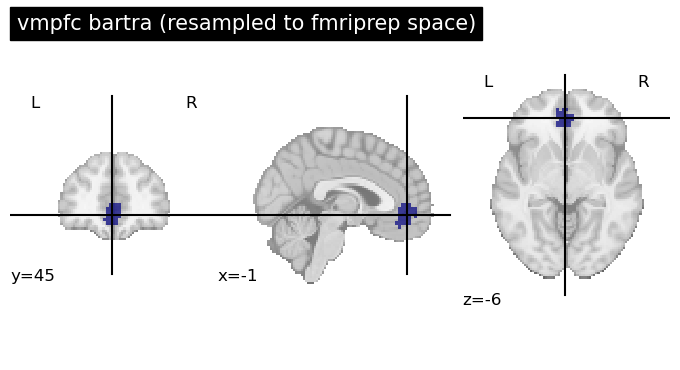

In [8]:
plot_roi(vmpfc_bartra_outspace, title='vmpfc bartra (resampled to fmriprep space)')

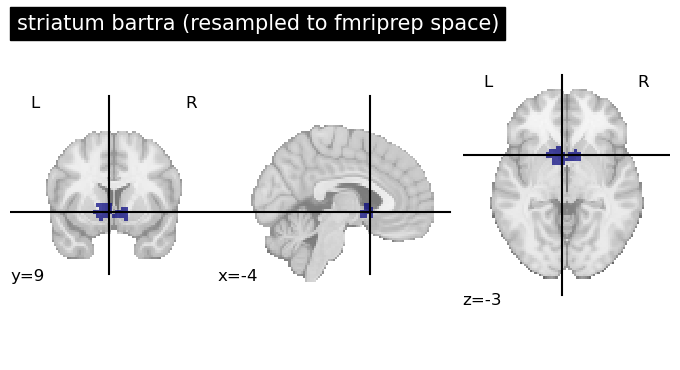

In [9]:
plot_roi(striatum_bartra_outspace, title='striatum bartra (resampled to fmriprep space)')

In [10]:
striatum_bartra_outspace.get_fdata().sum()

np.float64(128.0)

In [11]:
vmpfc_bartra_outspace.get_fdata().sum()

np.float64(119.0)

In [12]:
#vmpfc_bartra_outspace.to_filename(os.path.join(outpath, 'vmpfc_bartra2013_MNI152NLin2009cAsym.nii'))

In [13]:
#striatum_bartra_outspace.to_filename(os.path.join(outpath, 'striatum_bartra2013_MNI152NLin2009cAsym.nii'))

# AAL - Parietal cortex

In [14]:
from nilearn.datasets import fetch_atlas_aal
aal = fetch_atlas_aal()

[get_dataset_dir] Dataset found in /Users/hugofluhr/nilearn_data/aal_SPM12


In [15]:
aal_img = load_img(aal['maps'])
labels = aal['labels']
indices = list(aal['indices'])

In [16]:
parietal_name_fragments = [
    "Parietal_Sup",       # superior parietal (L/R)
    "Parietal_Inf",       # inferior parietal (L/R)
    "SupraMarginal",      # supramarginal gyrus
]
# Map AAL label names to their values (nifti integers) when any fragment matches
def is_parietal(name: str) -> bool:
    return any(frag in name for frag in parietal_name_fragments)

selected_label_values = [int(idx) for name, idx in zip(labels, indices) if is_parietal(name)]
selected_label_names = [name for name in labels if is_parietal(name)]

print("Selected AAL labels for parietal ROI:")
for n in selected_label_names:
    print(" -", n)

Selected AAL labels for parietal ROI:
 - Parietal_Sup_L
 - Parietal_Sup_R
 - Parietal_Inf_L
 - Parietal_Inf_R
 - SupraMarginal_L
 - SupraMarginal_R


In [17]:
# Resampling:
aal_resampled = resample_to_img(aal_img, ref_img, interpolation='nearest', force_resample=True, copy_header=True)

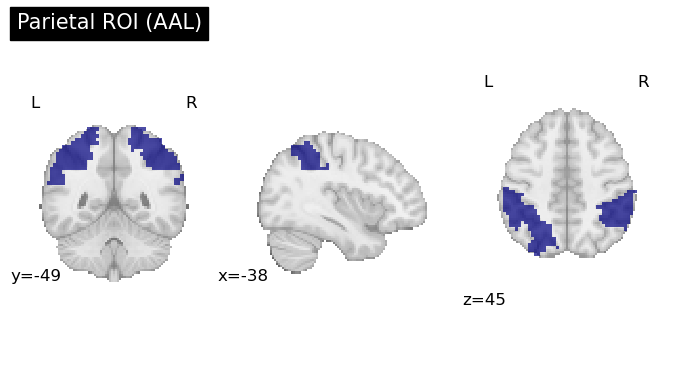

In [18]:
parietal_mask = np.isin(aal_resampled.get_fdata(), selected_label_values)
parietal_mask = new_img_like(aal_resampled, parietal_mask.astype(np.uint8))
plot_roi(parietal_mask, title="Parietal ROI (AAL)", draw_cross=False)

In [ ]:
#parietal_mask.to_filename(os.path.join(outpath, 'parietal_AAL_MNI152NLin2009cAsym.nii'))

# HMAT - (pre)motor areas

In [19]:
hmat_img_path = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/HMAT/HMAT (Mayka 2005).nii'
hmat_txt_path = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/HMAT/HMAT (Mayka 2005).txt'

In [20]:
hmat_img = load_img(hmat_img_path)
hmat_resampled = resample_to_img(hmat_img, ref_img, interpolation='nearest', force_resample=True, copy_header=True)

In [21]:
with open(hmat_txt_path, 'r') as f:
    hmat_labels = f.readlines()

In [22]:
hmat_labels

['1 Right_M1\n',
 '2 Left_M1\n',
 '3 Right_S1\n',
 '4 Left_S1\n',
 '5 Right_SMA\n',
 '6 Left_SMA\n',
 '7 Right_preSMA\n',
 '8 Left_preSMA\n',
 '9 Right_PMd\n',
 '10 Left_PMd\n',
 '11 Right_PMv\n',
 '12 Left_PMv\n']

In [23]:
selected_hmat = [1, 2, 5, 6, 7, 8, 9, 10, 11, 12]

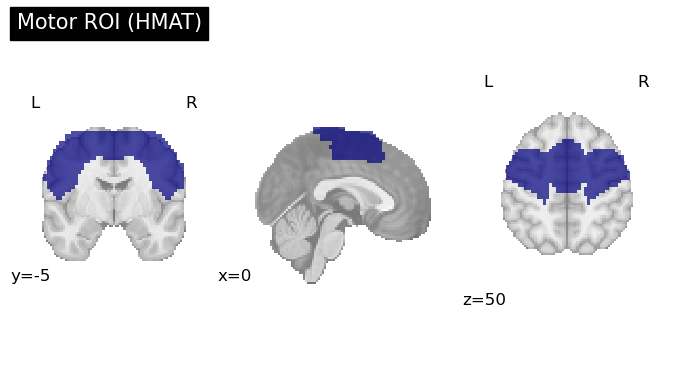

In [24]:
motor_mask = np.isin(hmat_resampled.get_fdata(), selected_hmat)
motor_mask = new_img_like(hmat_resampled, motor_mask.astype(np.uint8))
plot_roi(motor_mask, title="Motor ROI (HMAT)", draw_cross=False)

In [ ]:
#motor_mask.to_filename(os.path.join(outpath, 'motor_HMAT_MNI152NLin2009cAsym.nii'))

# Guida et al. 2022 - putamen

In [25]:
guida_dir = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/guida2022/merged_experimental__natural_cluster_forming_0.001_cluster_level_0.05_perms_1000'

In [26]:
from pathlib import Path

In [27]:
nii_files = list(Path(guida_dir).glob('*.nii'))
nii_files

[PosixPath('/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/guida2022/merged_experimental__natural_cluster_forming_0.001_cluster_level_0.05_perms_1000/merged_experimental__natural_Z.nii'),
 PosixPath('/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/guida2022/merged_experimental__natural_cluster_forming_0.001_cluster_level_0.05_perms_1000/merged_experimental__natural_p001_C05_1k_clust.nii'),
 PosixPath('/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/guida2022/merged_experimental__natural_cluster_forming_0.001_cluster_level_0.05_perms_1000/merged_experimental__natural_p001_C05_1k_Z.nii'),
 PosixPath('/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/guida2022/merged_experimental__natural_cluster_forming_0.001_cluster_level_0.05_perms_1000/merged_experimental__natural_p001_C05_1k_ALE.nii'),
 PosixPath('/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample/masks/guida2022/merged_experimental__natural_cluster_forming_0.001_c

/Users/hugofluhr/miniforge3/envs/neuroim/lib/python3.10/site-packages/numpy/ma/core.py:2892: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


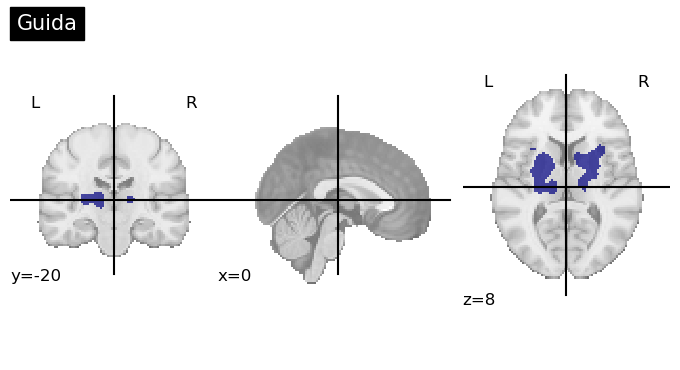

In [58]:
img = load_img(nii_files[1])
habit_mask = math_img("(img == 1) | (img == 2)", img=img)
plot_roi(habit_mask, title="Guida", cut_coords=(0, -20, 8))

In [62]:
habit_mask_outspace = resample_to_img(habit_mask, ref_img, interpolation='nearest', force_resample=True, copy_header=True)

In [63]:
habit_mask_outspace.to_filename(os.path.join(outpath, 'habit_Guida2022_MNI152NLin2009cAsym.nii'))

In [50]:
# guida_dir2 = '/Users/hugofluhr/phd_local/data/LearningHabits/guida2022/meta_analysis_results_stat_maps_ale/mricrogl figs data/nat_exp'
# nii_files2 = list(Path(guida_dir2).glob('*.nii*'))
# nii_files2

In [51]:
# img = load_img(nii_files2[3])
# plot_roi(img, title="Guida ALE", cut_coords=(0, -20, 8))

In [64]:
from nilearn.image import load_img

# List all .nii or .nii.gz files in outpath
nii_files_outdir = [f for f in os.listdir(outpath) if f.endswith('.nii') or f.endswith('.nii.gz')]

# Check affine of each image against ref_img
for fname in nii_files_outdir:
    img_path = os.path.join(outpath, fname)
    img = load_img(img_path)
    if not np.allclose(img.affine, ref_img.affine):
        print(f"WARNING: {fname} has a different affine (not in reference space)")
    else:
        print(f"{fname} is in the correct space.")

striatum_bartra2013_MNI152NLin2009cAsym.nii is in the correct space.
habit_Guida2022_MNI152NLin2009cAsym.nii is in the correct space.
vmpfc_bartra2013_MNI152NLin2009cAsym.nii is in the correct space.
parietal_AAL_MNI152NLin2009cAsym.nii is in the correct space.
motor_HMAT_MNI152NLin2009cAsym.nii is in the correct space.


# Fusiform mask

In [ ]:
fusiform_mask = '/home/ubuntu/data/learning-habits/masks/fusiform_association-test_z_FDR_0.01.nii.gz'

In [ ]:
fusiform_mask = load_img(fusiform_mask)
plot_stat_map(fusiform_mask, title='Fusiform Mask', display_mode='mosaic')

In [ ]:
thresholded_fusiform = threshold_img(fusiform_mask, threshold=12, cluster_threshold=40)
thresholded_fusiform = math_img('img > 0', img=thresholded_fusiform)
plot_roi(thresholded_fusiform, title='Fusiform mask', display_mode='mosaic')

In [ ]:
# save fusiform mask
thresholded_fusiform.to_filename('/home/ubuntu/data/learning-habits/masks/fusiform_mask.nii.gz')

# Old masks
up to October 2025

In [ ]:
vmpfc_mask = '/Users/hugofluhr/data/LH_dev/masks/binConjunc_PvNxDECxRECxMONxPRI_vmpfc.nii.gz'
striatum_mask = '/Users/hugofluhr/data/LH_dev/masks/binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz'

putamen_mask = '/Users/hugofluhr/data/LH_dev/masks/putamen_association-test_z_FDR_0.01.nii.gz'
parietal_mask = '/Users/hugofluhr/data/LH_dev/masks/parietal cortex_association-test_z_FDR_0.01.nii.gz'

In [ ]:
vmpfc_mask = load_img(vmpfc_mask)
plot_roi(vmpfc_mask, title='VMPFC mask', display_mode='mosaic')

In [ ]:
striatum_mask = load_img(striatum_mask)
plot_roi(striatum_mask, title='Striatum mask', display_mode='mosaic')

In [ ]:
putamen_mask = load_img(putamen_mask)
plot_stat_map(putamen_mask, threshold=8, title='Putamen mask', display_mode='mosaic')

In [ ]:
thresholded_putamen = threshold_img(putamen_mask, threshold=8)
thresholded_putamen = math_img('img > 0', img=thresholded_putamen)
plot_roi(thresholded_putamen, title='Putamen mask', display_mode='mosaic')

In [ ]:
thresholded_putamen.to_filename('/Users/hugofluhr/data/LH_dev/masks/putamen_mask.nii.gz')

In [ ]:
parietal_mask = load_img(parietal_mask)
plot_stat_map(parietal_mask, threshold=5, title='Parietal mask', display_mode='mosaic')

In [ ]:
thresholded_parietal = threshold_img(parietal_mask, threshold=5, cluster_threshold=50)
thresholded_parietal = math_img('img > 0', img=thresholded_parietal)

In [ ]:
plot_roi(thresholded_parietal, title='Parietal mask (thresholded)', display_mode='mosaic')

In [ ]:
thresholded_parietal = threshold_img(parietal_mask, threshold=5, cluster_threshold=500)
thresholded_parietal = math_img('img > 0', img=thresholded_parietal)

In [ ]:
plot_roi(thresholded_parietal, title='Parietal mask (thresholded)', display_mode='mosaic')

In [ ]:
thresholded_parietal.to_filename('/Users/hugofluhr/data/LH_dev/masks/parietal_mask.nii.gz')